In [1]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

In [2]:
df=pd.read_csv(r"C:\Users\SubramaniyasivaV\Documents\archive (1)\data.csv")

In [3]:
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
brand                0
name                 0
price                0
spec_rating          0
processor            0
CPU                  0
Ram                  0
Ram_type             0
ROM                  0
ROM_type             0
GPU                  0
display_size         0
resolution_width     0
resolution_height    0
OS                   0
warranty             0
dtype: int64

In [4]:
df=df.drop(columns=['brand','name','spec_rating'])

In [5]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'price', 'processor', 'CPU', 'Ram',
       'Ram_type', 'ROM', 'ROM_type', 'GPU', 'display_size',
       'resolution_width', 'resolution_height', 'OS', 'warranty'],
      dtype='object')

In [6]:
df.dtypes

Unnamed: 0.1           int64
Unnamed: 0             int64
price                  int64
processor             object
CPU                   object
Ram                   object
Ram_type              object
ROM                   object
ROM_type              object
GPU                   object
display_size         float64
resolution_width     float64
resolution_height    float64
OS                    object
warranty               int64
dtype: object

In [7]:
df['OS'].value_counts()

OS
Windows 11 OS         782
Windows 10 OS          28
DOS OS                 18
Windows 11  OS         15
Mac OS                 12
Windows 10  OS         10
Chrome OS              10
Windows OS              9
Mac 10.15.3\t OS        2
Ubuntu OS               2
DOS 3.0 OS              2
Android 11 OS           1
Mac Catalina OS         1
Mac High Sierra OS      1
Name: count, dtype: int64

In [8]:
for i in range(len(df['OS'])):
    if "Windows 11 OS" in df.loc[i, 'OS'] or "Windows 11  OS" in df.loc[i, 'OS']:
        df.loc[i, 'OS'] = "Windows 11"



In [9]:
for i in range(len(df['OS'])):
    if "Windows 10 OS" in df.loc[i, 'OS'] or "Windows 10  OS" in df.loc[i, 'OS']:
        df.loc[i, 'OS'] = "Windows 10"



In [10]:
df['OS'].value_counts()

OS
Windows 11            797
Windows 10             38
DOS OS                 18
Mac OS                 12
Chrome OS              10
Windows OS              9
DOS 3.0 OS              2
Ubuntu OS               2
Mac 10.15.3\t OS        2
Android 11 OS           1
Mac Catalina OS         1
Mac High Sierra OS      1
Name: count, dtype: int64

In [11]:
df=df.drop(df.columns[:2],axis=1)

In [12]:
df.shape

(893, 13)

In [13]:
df.dtypes

price                  int64
processor             object
CPU                   object
Ram                   object
Ram_type              object
ROM                   object
ROM_type              object
GPU                   object
display_size         float64
resolution_width     float64
resolution_height    float64
OS                    object
warranty               int64
dtype: object

In [14]:
df.columns

Index(['price', 'processor', 'CPU', 'Ram', 'Ram_type', 'ROM', 'ROM_type',
       'GPU', 'display_size', 'resolution_width', 'resolution_height', 'OS',
       'warranty'],
      dtype='object')

In [15]:
df=df.drop(columns=['resolution_width','resolution_height','warranty'])

In [16]:
df.dtypes

price             int64
processor        object
CPU              object
Ram              object
Ram_type         object
ROM              object
ROM_type         object
GPU              object
display_size    float64
OS               object
dtype: object

In [17]:
le=LabelEncoder()

In [18]:
cols=['processor','CPU','Ram','Ram_type','ROM','ROM_type','GPU','OS']

In [19]:
from sklearn.compose import ColumnTransformer

In [20]:
X = df.drop(columns=['price'])
y=df['price']

In [21]:
column_transformer = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cols)
    ],
    remainder='passthrough'  # numerical columns will remain as is
)

# Apply transformation
X_encoded = column_transformer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [22]:
rf_model=RandomForestRegressor()

In [23]:
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [24]:
y_pred=rf_model.predict(X_test)

In [25]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 827591118.48
R² Score: 0.76


In [26]:
dt_model=DecisionTreeRegressor(random_state=43)

In [27]:
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=43)

In [28]:
y_pred1=dt_model.predict(X_test)

In [29]:
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 1498046189.88
R² Score: 0.56


In [30]:
from xgboost import XGBRegressor

# Initialize the model
xgb = XGBRegressor(random_state=42)

In [31]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [32]:
y_pred2=xgb.predict(X_test)

In [33]:
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 595864232.55
R² Score: 0.83


In [34]:
lgb=LGBMRegressor()

In [35]:
lgb.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 714, number of used features: 39
[LightGBM] [Info] Start training from score 80519.838936
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

LGBMRegressor()

In [36]:
y_pred3=lgb.predict(X_test)
mse = mean_squared_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 746241389.21
R² Score: 0.78


In [37]:
lr=LinearRegression()

In [38]:
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
y_pred4=lr.predict(X_test)

In [40]:
mse = mean_squared_error(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 202852745457711170142533201166336.00
R² Score: -59198653462406252986368.00


In [41]:
print(r2_score(y_test, y_pred),mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred1),mean_squared_error(y_test, y_pred1))
print(r2_score(y_test, y_pred2),mean_squared_error(y_test, y_pred2))
print(r2_score(y_test, y_pred3),mean_squared_error(y_test, y_pred3))
print(r2_score(y_test, y_pred4),mean_squared_error(y_test, y_pred4))

0.7584835259638197 827591118.4807173
0.5628241704826227 1498046189.8794618
0.8261085748672485 595864232.5501932
0.7822238723008899 746241389.2060504
-5.919865346240625e+22 2.0285274545771117e+32


In [42]:
#chosen xgb as best_model
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# Separate features and target
X = df.drop("price", axis=1)
y = df["price"]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(exclude='object').columns.tolist()

# Column transformer
preprocessor = ColumnTransformer(transformers=[
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ("num", StandardScaler(), numerical_cols)
])

# Build pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", XGBRegressor(objective="reg:squarederror", random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train pipeline
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred2 = pipeline.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred2))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.8261085748672485
MSE: 827591118.4807173


In [43]:
X.columns


Index(['processor', 'CPU', 'Ram', 'Ram_type', 'ROM', 'ROM_type', 'GPU',
       'display_size', 'OS'],
      dtype='object')

In [44]:
def new_data():
    processor = input("Enter processor: ")
    CPU = input("Enter CPU: ")
    Ram = input("Enter RAM (in GB): ")
    Ram_type = input("Enter RAM type: ")
    ROM = input("Enter ROM (in GB): ")
    ROM_type = input("Enter ROM type: ")
    GPU = input("Enter GPU: ")
    display_size = float(input("Enter display size (in inches): "))
    OS = input("Enter Operating System: ")

    # Return as DataFrame (to match model input)
    return pd.DataFrame([{
        'processor': processor,
        'CPU': CPU,
        'Ram': Ram,
        'Ram_type': Ram_type,
        'ROM': ROM,
        'ROM_type': ROM_type,
        'GPU': GPU,
        'display_size': display_size,
        'OS': OS
    }])

In [45]:
# data = new_data()
# prediction = pipeline.predict(data)
# print("Predicted price:", prediction[0])


In [46]:
import pickle

# Save the trained pipeline to a file
with open("xgb_laptop_price_model.pkl", "wb") as f:
    pickle.dump(pipeline, f)


In [47]:
model=['Random Forest','Decision Tree','XGBOOST','LGBM','LINEAR REGRESSION']
r2s=[r2_score(y_test, y_pred),r2_score(y_test, y_pred1),r2_score(y_test, y_pred2),r2_score(y_test, y_pred3),r2_score(y_test, y_pred4)]

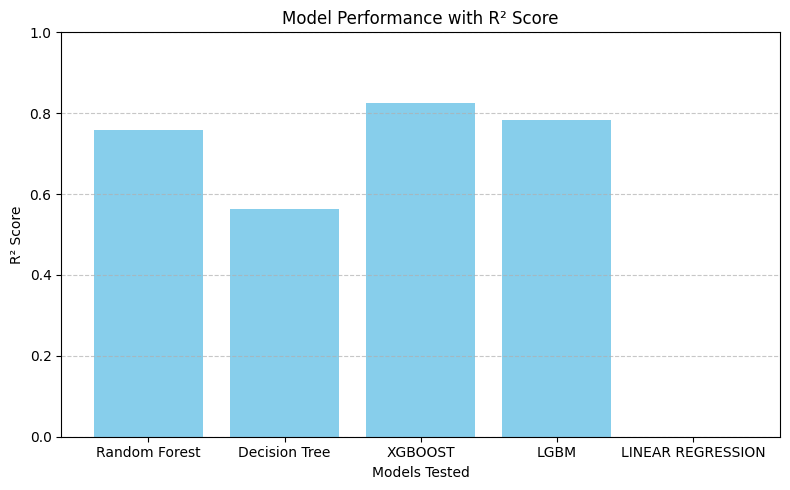

In [48]:
import matplotlib.pyplot as plt


# Plotting
plt.figure(figsize=(8, 5))
plt.bar(model, r2s, color='skyblue')

plt.title("Model Performance with R² Score")
plt.xlabel("Models Tested")
plt.ylabel("R² Score")
plt.ylim(0, 1)  # Optional: sets y-axis range

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [49]:
r2s

[0.7584835259638197,
 0.5628241704826227,
 0.8261085748672485,
 0.7822238723008899,
 -5.919865346240625e+22]